In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import sklearn.manifold, sklearn.cluster
import rdkit, rdkit.Chem, rdkit.Chem.Draw
from rdkit.Chem.Draw import IPythonConsole
np.random.seed(0)
import warnings
IPythonConsole.ipython_useSVG = True
warnings.filterwarnings('ignore')
sns.set_context('notebook')
sns.set_style('white',  {'xtick.bottom':True, 'ytick.left':True, 'xtick.color': '#666666', 'ytick.color': '#666666',
                        'axes.edgecolor': '#666666', 'axes.linewidth':     0.8 })
color_cycle = ['#1bbc28', '#F06060', '#5C4B51', '#F3B562', '#6e5687']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_cycle) 

In [2]:
soldata = pd.read_csv('curated-solubility-dataset.csv')
soldata.head()
print (len(soldata))

9982


In [3]:

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors, Descriptors3D, Draw, rdMolDescriptors, Draw, PandasTools
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat, GetTanimotoDistMat
from rdkit.Chem.Draw import IPythonConsole

%config Completer.use_jedi = False
PandasTools.RenderImagesInAllDataFrames(images=True)

In [4]:
mols = [Chem.MolFromSmiles(smi) for smi in soldata.SMILES]

[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not removing hydrogen atom without neighbors
[12:23:17] WARNING: not r

In [5]:
#bar=progressbar.ProgressBar(max_value=len(soldata))
table=pd.DataFrame()
for i,mol in enumerate(mols):
    #Chem.SanitizeMol(mol)
    soldata.loc[i,'SMILES']=Chem.MolToSmiles(mol)
    soldata.loc[i,'Mol']=mol
    soldata.loc[i,'NumAliphaticCarbocycles']=Descriptors.NumAliphaticCarbocycles(mol)
    soldata.loc[i,'NumAliphaticHeterocycles']=Descriptors.NumAliphaticHeterocycles(mol)
    soldata.loc[i,'NumAliphaticRings']=Descriptors.NumAliphaticRings(mol)
    soldata.loc[i,'NumAromaticCarbocycles']=Descriptors.NumAromaticCarbocycles(mol)
    soldata.loc[i,'NumAromaticHeterocycles']=Descriptors.NumAromaticHeterocycles(mol)
    soldata.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    #bar.update(i+1)

Mol   ID  \
0  <img data-content="rdkit/molecule" src="data:i...  A-3   
1  <img data-content="rdkit/molecule" src="data:i...  A-4   
2  <img data-content="rdkit/molecule" src="data:i...  A-5   
3  <img data-content="rdkit/molecule" src="data:i...  A-8   
4  <img data-content="rdkit/molecule" src="data:i...  A-9   

                                                Name  \
0         N,N,N-trimethyloctadecan-1-aminium bromide   
1                           Benzo[cd]indol-2(1H)-one   
2                               4-chlorobenzaldehyde   
3  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  Solubility   SD  \
0                CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-]   -3.616127  0.0   
1                               O=C1Nc2cccc3cccc1c23   -3.254767  0.0   
2                                    O=Cc1ccc(Cl)cc1   -2.177078  0.0   
3  CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...   -3.924409  0.0   
4  c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...   -4.662065  0.0   

   Ocurrences Group  ...  RingCount    TPSA   LabuteASA      BalabanJ  \
0           1    G1  ...        0.0    0.00  158.520601  0.000000e+00   
1           1    G1  ...        3.0   29.10   75.183563  2.582996e+00   
2           1    G1  ...        1.0   17.07   58.261134  3.009782e+00   
3           1    G1  ...        6.0  120.72  323.755434  2.322963e-07   
4           1    G1  ...        6.0   56.60  183.183268  1.084427e+00   

       BertzCT  NumAliphaticCarbocycles  NumAliphaticHeterocycles  \
0   210.377334                      0.0                       0.0   
1   511.229248                      0.0                       1.0   
2   202.661065                      0.0                       0.0   
3  1964.648666                      0.0                       0.0   
4   769.899934                      0.0                       4.0   

   NumAromaticCarbocycles  NumAromaticHeterocycles  FractionCSP3  
0                     0.0                      0.0      1.000000  
1                     2.0                      0.0      0.000000  
2                     1.0                      0.0      0.000000  
3                     6.0                      0.0      0.173913  
4                     2.0                      0.0      0.520000  

[5 rows x 32 columns]
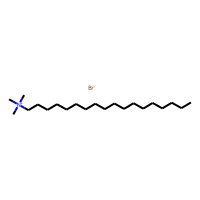
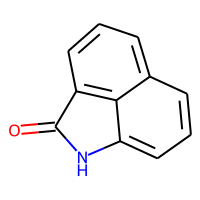
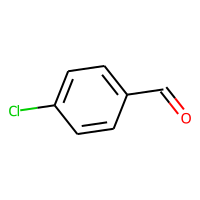
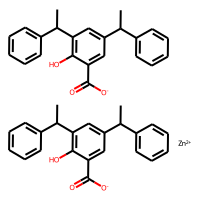
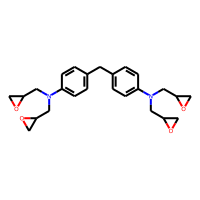

In [6]:
first_column = soldata.pop('Mol')
soldata.insert(0, 'Mol', first_column)
soldata.head(5)

In [7]:
soldata.columns

Index(['Mol', 'ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'FractionCSP3'],
      dtype='object')

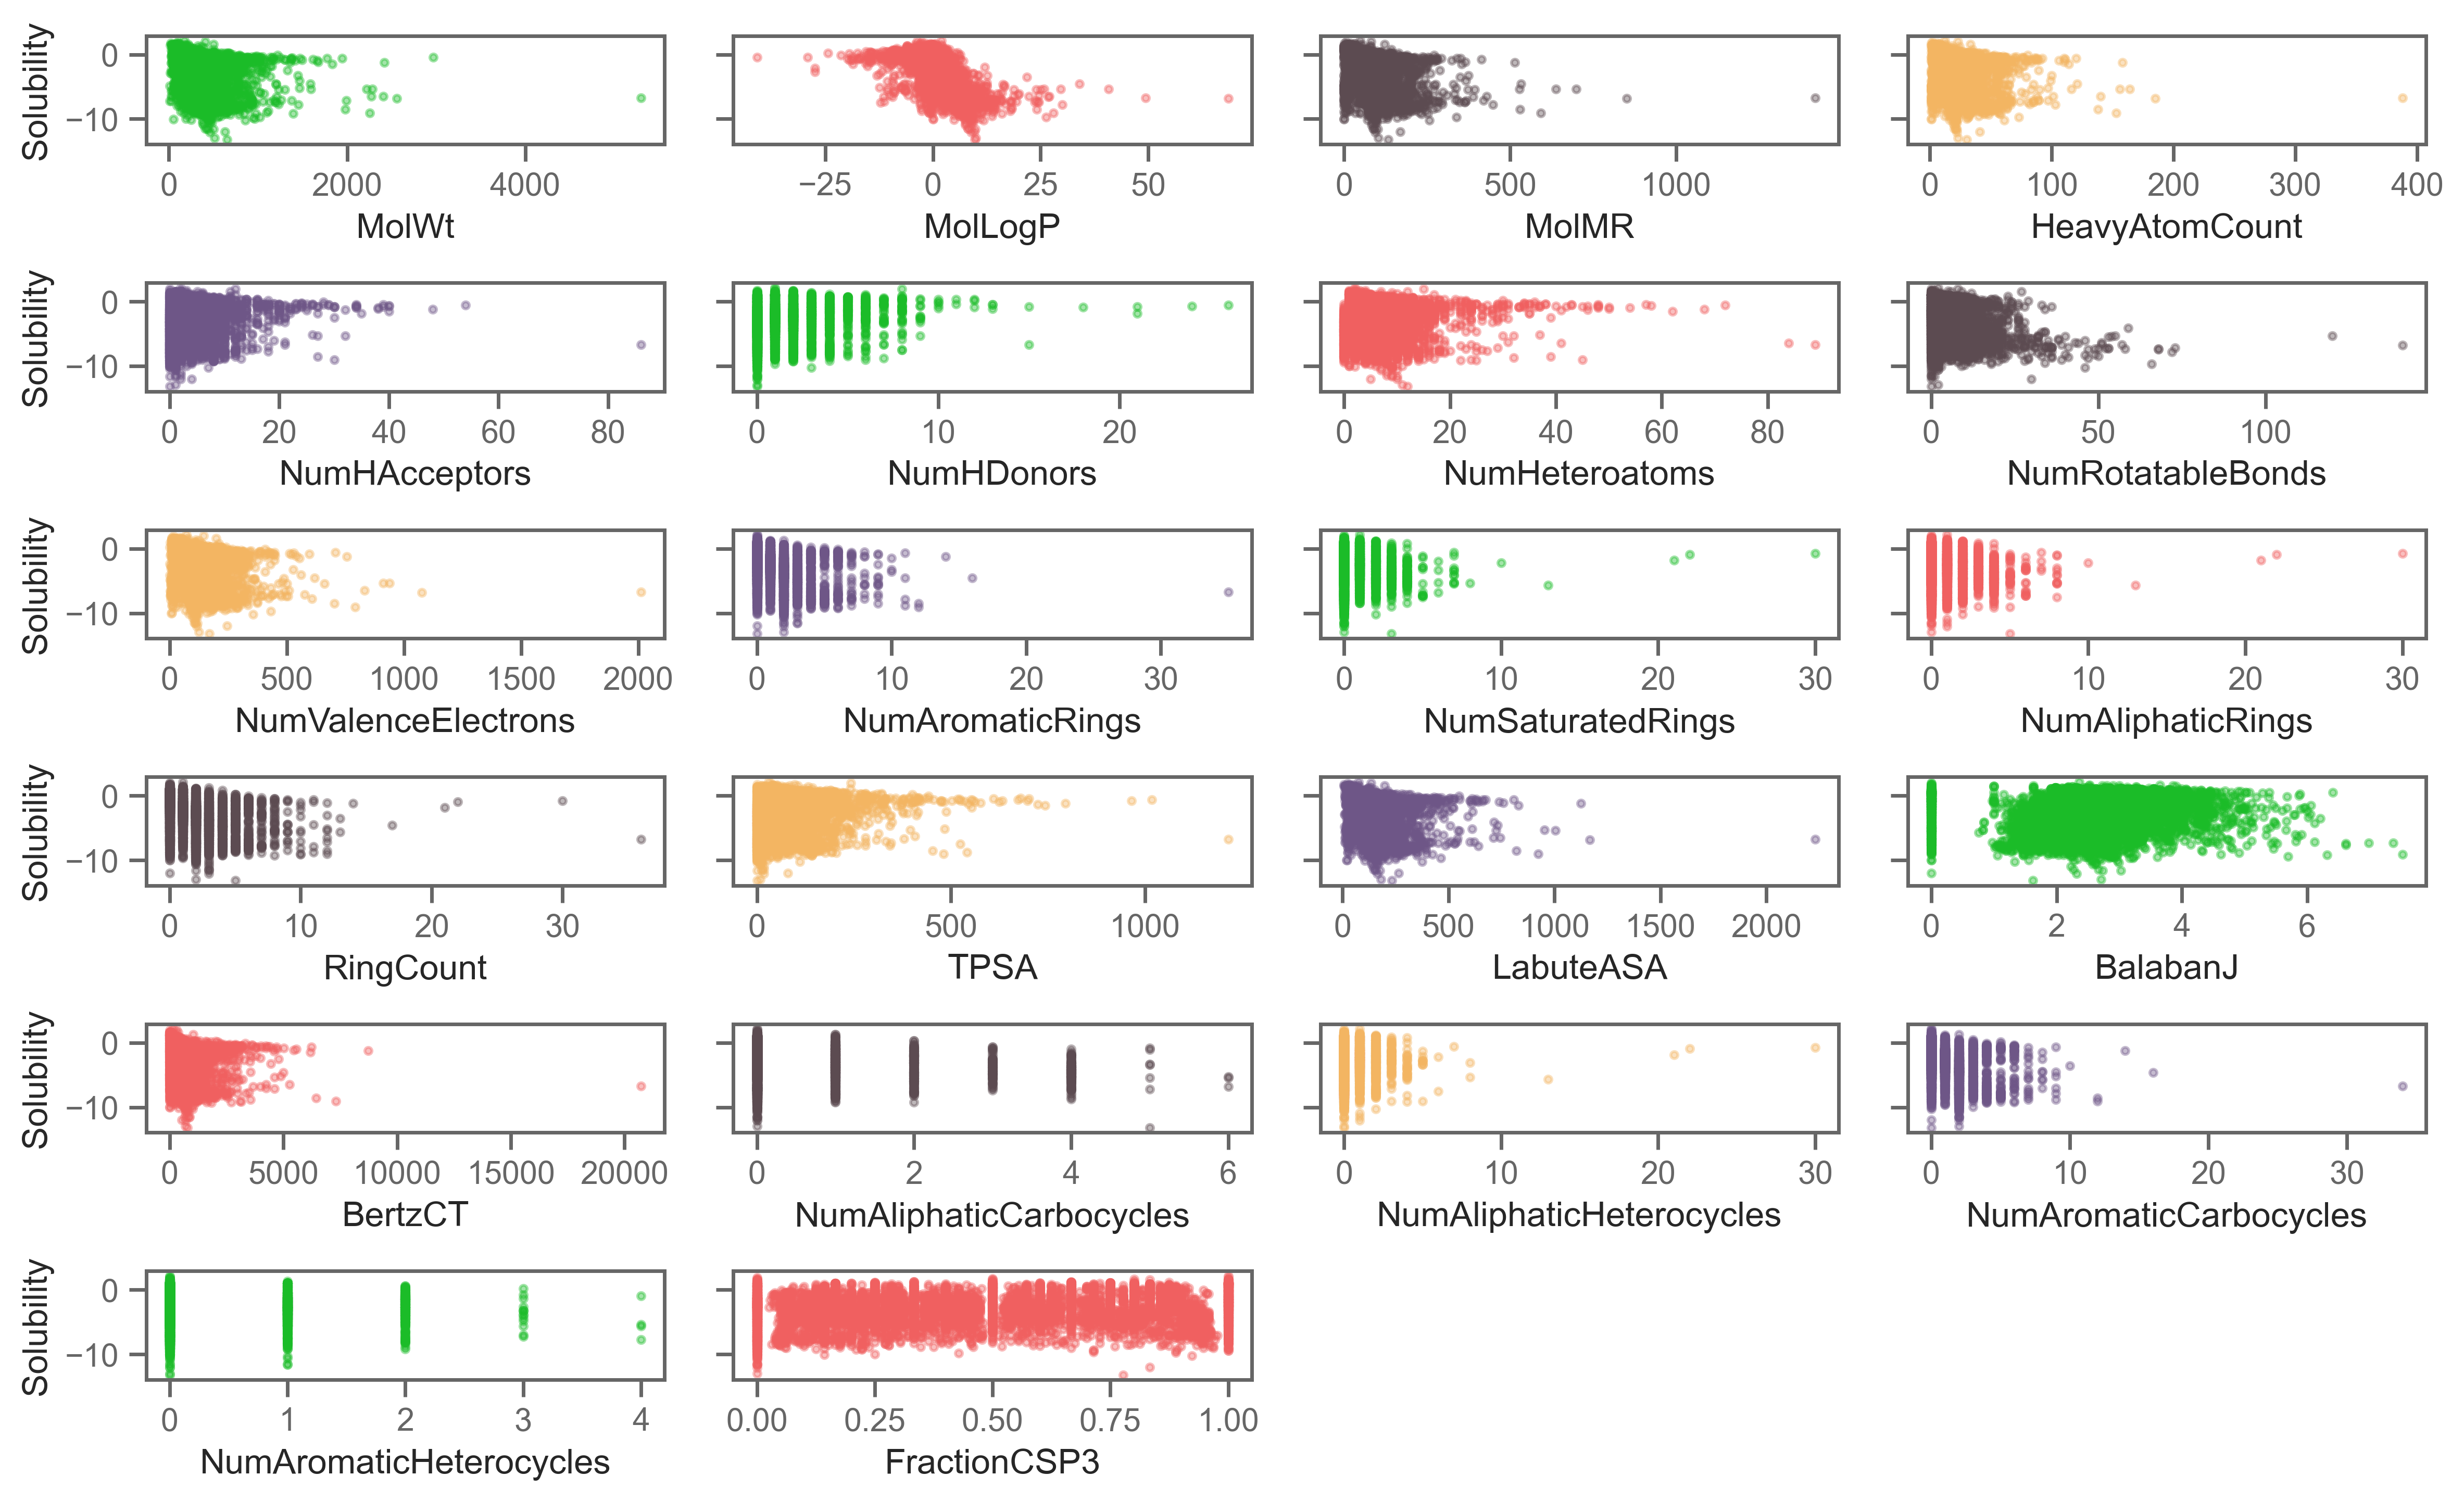

In [8]:
features_start_at = list(soldata.columns).index('MolWt')
feature_names = soldata.columns[features_start_at:]

fig, axs = plt.subplots(nrows=7, ncols=4, sharey=True, figsize=(12, 8), dpi=400)
axs = axs.flatten() # don't want to think about i/j
for i,n in enumerate(feature_names):
    ax = axs[i]
    ax.scatter(
        soldata[n], soldata.Solubility, 
        s = 6, alpha=0.4,
        color = f'C{i}') # add some color 
    if i % 4 == 0:
        ax.set_ylabel('Solubility')
    ax.set_xlabel(n)
# hide empty subplots
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

# Data cleaning

In [10]:
soldata.drop(soldata[soldata['MolWt'] < 120].index, inplace = True)  or soldata.drop(soldata[soldata['MolWt'] > 600].index, inplace = True)
soldata.drop(soldata[soldata['TPSA'] < 30].index, inplace = True)  or soldata.drop(soldata[soldata['TPSA'] > 140].index, inplace = True)
soldata.drop(soldata[soldata['NumRotatableBonds'] > 12].index, inplace = True)

In [11]:
len(soldata)

5559

# after removing outliers

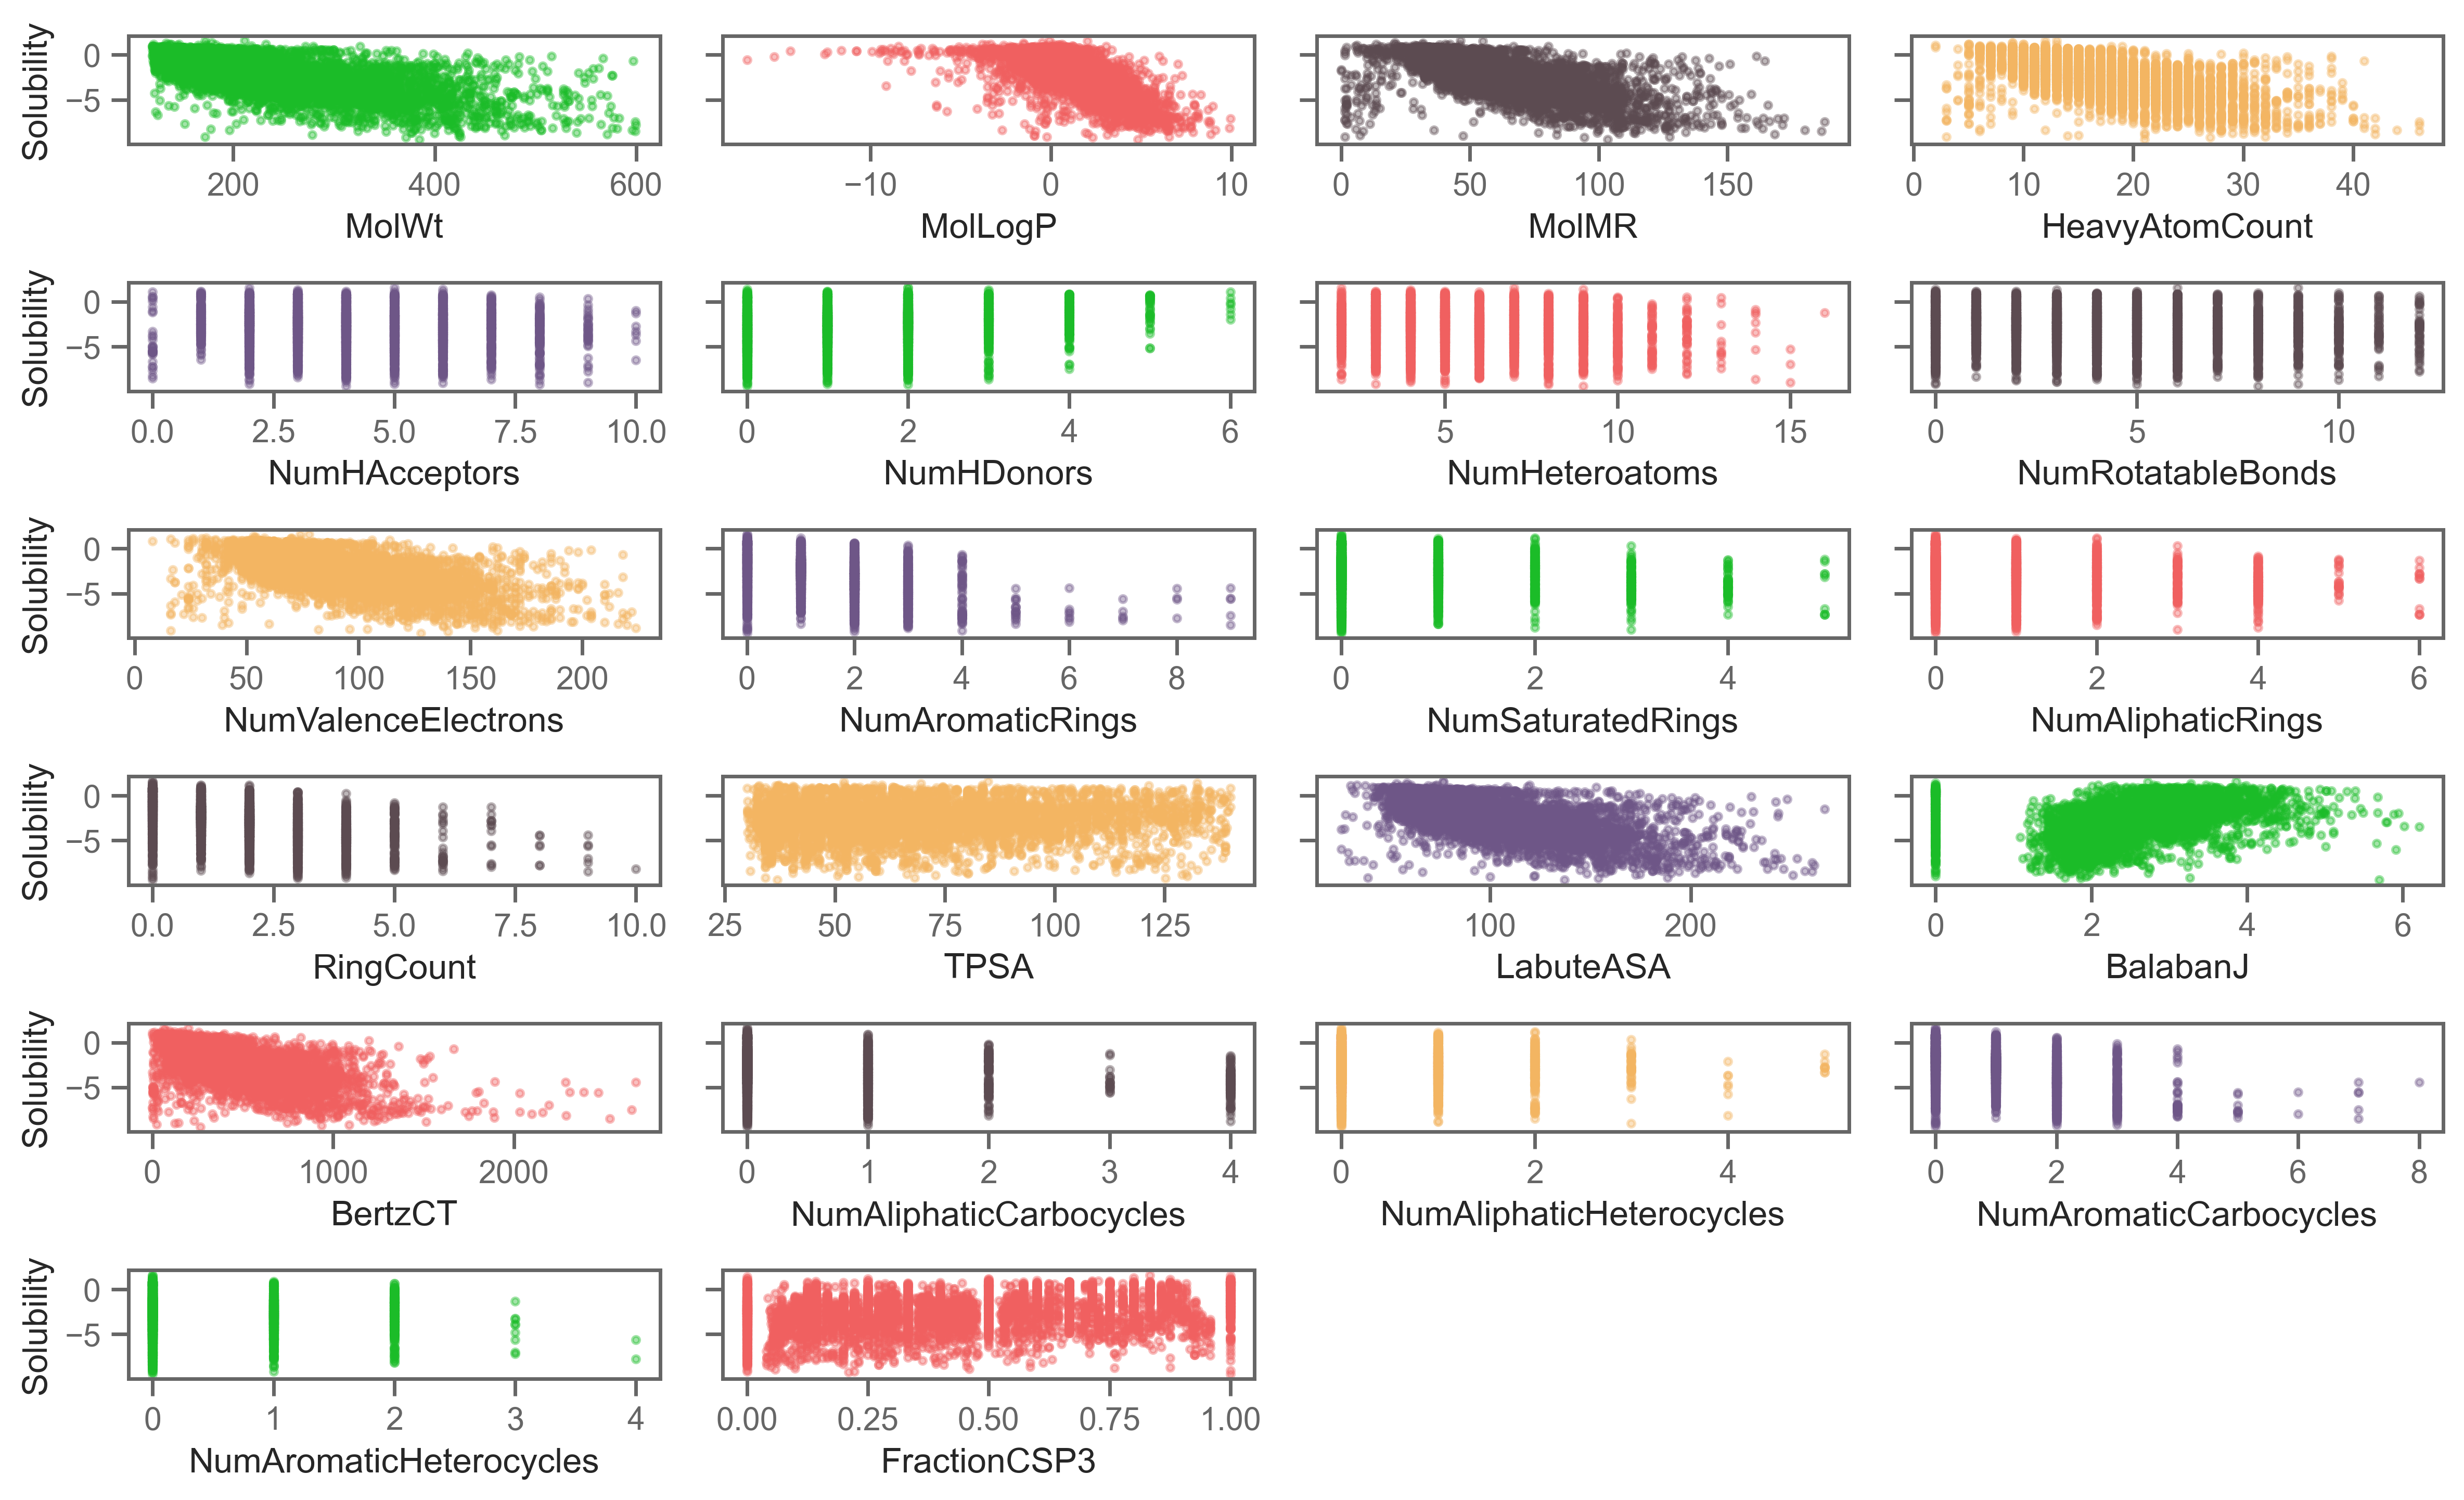

In [12]:
features_start_at = list(soldata.columns).index('MolWt')
feature_names = soldata.columns[features_start_at:]

fig, axs = plt.subplots(nrows=7, ncols=4, sharey=True, figsize=(12, 8), dpi=400)
axs = axs.flatten() # don't want to think about i/j
for i,n in enumerate(feature_names):
    ax = axs[i]
    ax.scatter(
        soldata[n], soldata.Solubility, 
        s = 6, alpha=0.4,
        color = f'C{i}') # add some color 
    if i % 4 == 0:
        ax.set_ylabel('Solubility')
    ax.set_xlabel(n)
# hide empty subplots
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

In [13]:
import numpy as np

bins = [np.log10(x*1e-6) for x in [30,200]]
bins = [-100] + bins + [100]
soldata['bin'] = pd.cut(soldata.Solubility,bins=bins,labels=["Low","Medium","High"])

In [14]:
soldata.bin

4          Low
6         High
7         High
9          Low
16        High
         ...  
9973      High
9974      High
9976    Medium
9977      High
9981       Low
Name: bin, Length: 5559, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [15]:
value=[]
for i,row in soldata.iterrows():
    if row['bin'] == 'Low':
        value.append(0)
    else:
        value.append(1)

In [16]:
len(value)

5559

In [17]:
soldata['Value'] = value

In [19]:
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import SimilarityMaps

def genFP(mol,Dummy=-1):
    fp = SimilarityMaps.GetMorganFingerprint(mol)   #calulates the atom pairs finger  prints
    fp_vect = np.zeros((1))
     
    DataStructs.ConvertToNumpyArray(fp, fp_vect)
    return fp_vect

In [20]:
mols=[]
X=[]
y=[]

for i,row in soldata.iterrows():
    try:
        mol = Chem.MolFromSmiles(row['SMILES'])
        if type(mol)!=type(None):
            fp_vect=genFP(mol)
            mols.append(mol)
            
            X.append(fp_vect)
            y.append(row['Value'])
            
    except:
        print("failed")
        
print("smiles",len(soldata))
print("converted",len(mols))

[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:39] WARNING: not removing hydrogen atom without neighbors
[12:29:40] WARNING: not removing hydrogen atom without neighbors
[12:29:40] WARNING: not removing hydrogen atom without neighbors
[12:29:40] WARNING: not removing hydrogen atom without neighbors
[12:29:40] WARNING: not removing hydrogen atom without neighbors
[12:29:40] WARNING: not removing hydrogen atom without neighbors
[12:29:40] WARNING: not removing hydrogen atom without neighbors
[12:29:40] WARNING: not r

smiles 5559
converted 5559


# Model building

In [21]:
from sklearn import linear_model
import sklearn.model_selection

In [22]:
X=np.array(X)
y=np.array(y)

In [23]:
X.shape

(5559, 2048)

In [24]:
y.shape

(5559,)

In [25]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, test_size=0.2)

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [36]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [37]:
xgb.score(X_train,y_train)

0.9709916797841242

In [38]:
xgb.score(X_test,y_test)

0.8929856115107914

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
predict = xgb.predict(X_test)

In [42]:
confusion_matrix(y_test,predict)

array([[108,  85],
       [ 34, 885]], dtype=int64)

In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.56      0.64       193
           1       0.91      0.96      0.94       919

    accuracy                           0.89      1112
   macro avg       0.84      0.76      0.79      1112
weighted avg       0.89      0.89      0.89      1112



# Similarity maps

In [45]:
def getProba(fp, predictionFunction):
  return predictionFunction((fp,))[0][1]
mols = [(Chem.MolFromSmiles('OCC(O)CO'),'Glycerol'),
    (Chem.MolFromSmiles('c1ccc2c(c1)cc3ccc4cccc5c4c3c2cc5'),'Benzo[a]pyrene'),
    (Chem.MolFromSmiles('CCN(N=O)C(N)=O'),'N-ethyl-N-nitrosourea'),
    (Chem.MolFromSmiles('CC(C)CCC(C)CCC1=CC=C2C(=C1)C=CC=C2[N+](=O)[O-]'),'Tester')
    ]


In [46]:
for mol,name in mols:
    #Make Prediction
    fp_vect = genFP(mol)
    fp_vect =fp_vect.reshape(1, -1)
    print ('Probability %s mutagenic %0.2f'%(name,estimator.predict_proba(fp_vect)[0][0]))

Probability Glycerol mutagenic 0.00
Probability Benzo[a]pyrene mutagenic 0.88
Probability N-ethyl-N-nitrosourea mutagenic 0.00
Probability Tester mutagenic 0.84


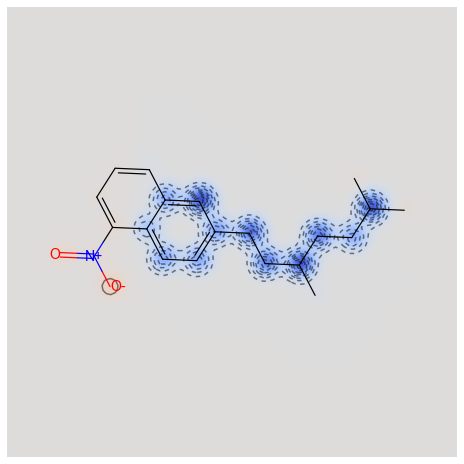

In [47]:
weights = SimilarityMaps.GetAtomicWeightsForModel(mol, SimilarityMaps.GetMorganFingerprint, lambda x: getProba(x, estimator.predict_proba))
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, weights,colorMap='coolwarm')
fig.savefig('similarity.png', bbox_inches='tight')

# saving the model using pickle

# Predictions

In [45]:
df = pd.read_excel('External_set.xlsx')

In [46]:
df

cpd_ID                                             SMILES
0       SP9    O=S(NCCN1CCC(CC1)Cc2ccccc2)(c(cc3)cc4c3cccc4)=O
1      SP10   O=S(NCCCN1CCC(CC1)Cc2ccccc2)(c(cc3)cc4c3cccc4)=O
2      SP11    O=S(NCCN1CCC(CC1)Cc2ccccc2)(c(ccc3)c4c3cccc4)=O
3      SP12   O=S(NCCCN1CCC(CC1)Cc2ccccc2)(c(ccc3)c4c3cccc4)=O
4      SP13  O=S(NCCN1CCC(CC1)Cc2ccccc2)(c3ccc(c4ccccc4)cc3)=O
..      ...                                                ...
183  SP-244  Fc1ccc(C(c2n(CCCCN3CCC(CC3)c4ccccc4)nnn2)c5ccc...
184  SP-245  c1(CCC2CCN(CC2)CCCn3c(C(c4ccccc4)c5ccccc5)nnn3...
185  SP-246  Fc1ccc(C(c2n(CCCN3CCC(CC3)CCc4ccccc4)nnn2)c5cc...
186  SP-247  Clc1ccc(C(c2n(CCCN3CCC(CC3)CCc4ccccc4)nnn2)c5c...
187  SP-248  Clc1ccc(C(c2n(CCCN3CCC(CC3)CCc4ccccc4)nnn2)c5c...

[188 rows x 2 columns]

In [53]:
mols1=[]
fp=[]
for i,row in df.iterrows():
    try:
        mol = Chem.MolFromSmiles(row['SMILES'])
        if type(mol)!=type(None):
            fp_vect=genFP(mol)
            mols1.append(mol)
            
            fp.append(fp_vect)
        else:
            print(i)

            
    except:
        print("failed")

[12:54:41] SMILES Parse Error: syntax error while parsing: O=S(NCCCN1CCC(CC1)Cc2ccccc2)(c3ccc(c4ccc([MeO])cc4)cc3)=O
[12:54:41] SMILES Parse Error: Failed parsing SMILES 'O=S(NCCCN1CCC(CC1)Cc2ccccc2)(c3ccc(c4ccc([MeO])cc4)cc3)=O' for input: 'O=S(NCCCN1CCC(CC1)Cc2ccccc2)(c3ccc(c4ccc([MeO])cc4)cc3)=O'


54


There was a invalid smile so i just dropped using the index

In [54]:
df.iloc[54]

cpd_ID                                                SP-93
SMILES    O=S(NCCCN1CCC(CC1)Cc2ccccc2)(c3ccc(c4ccc([MeO]...
Name: 54, dtype: object

In [55]:
updtd_df = df.drop(54)

In [56]:
len(updtd_df)

187

In [57]:
molss=[]
fpp=[]
for i,row in updtd_df.iterrows():
    try:
        mol = Chem.MolFromSmiles(row['SMILES'])
        if type(mol)!=type(None):
            fp_vect=genFP(mol)
            molss.append(mol)
            
            fpp.append(fp_vect)
        else:
            print(i)

            
    except:
        print("failed")

In [58]:
predict = xgb.predict(fpp)

In [59]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [61]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
from sklearn.metrics import cohen_kappa_score

In [62]:
predictt = xgb.predict(X_test)

In [63]:
cohen_kappa_score(y_test, predictt)

0.5834917597290594

my cohens kappa score got a moderate score so my model works good